<a href="https://colab.research.google.com/github/wcrowley342/Kmeans/blob/main/kmeans_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Example 1

*   https://datatofish.com/k-means-clustering-python/
*   https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203



In [ ]:
from pandas import DataFrame

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [ ]:
#clustering with sklearn

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[55.1 46.1]
 [43.2 16.7]
 [29.6 66.8]]


In [ ]:
#get the cluster/centroid labels

print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


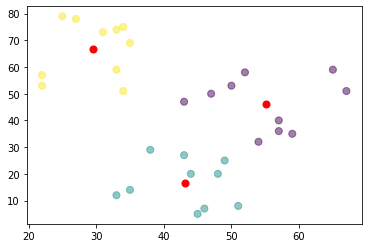

In [ ]:
#plot data & centroids

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#the center of each cluster (in red) represents the mean of all the observations that belong to that cluster.



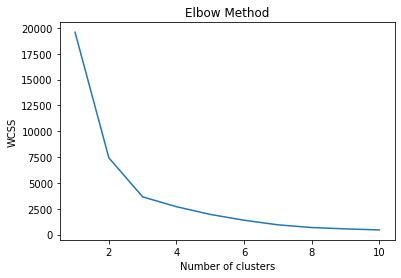

In [ ]:
#elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

if this is different from your original K #, you can just recategorize 

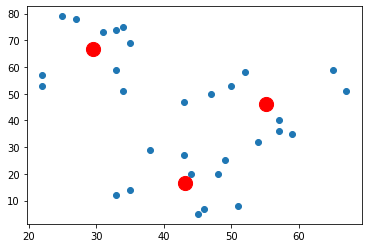

In [ ]:
#using optimum # of clusters 

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['x'], df['y'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

# Example 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


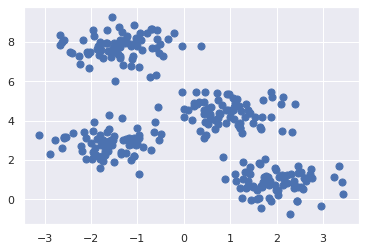

In [ ]:
#create a dataset from sklearn

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)




Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the n_init parameter, which defaults to 10).

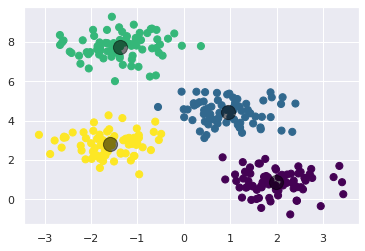

In [ ]:
#visualize the results

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**The number of clusters must be selected beforehand**

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

# Example 3 - Wine V1 

https://methodmatters.github.io/analyzing-wine-data-in-python-part-1/

In [ ]:
#import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [ ]:
#read in data

wine_data = pd.read_csv("/content/wine_data.csv", encoding='latin-1')  
wine_data.head()

,Name,abv,year,PriceRetail,Appellation_Region_Name,Varietal_Name,Varietal_WineType_Name,Winemakers_Notes
0,Milbrandt Traditions Merlot 2007,14.2,2007.0,14.99,Washington,Merlot,Red Wines,Our 2007 Traditions Merlot features grapes fro...
1,MacLaren Drouthy Neebors Syrah 2009,14.0,2009.0,35.00,California,Syrah/Shiraz,Red Wines,Deep Purple color. Layered aromatics: Black Ra...
2,Cliff Lede Poetry Stags Leap District Cabernet...,14.5,2001.0,125.00,California,Cabernet Sauvignon,Red Wines,Beautiful bottle-aged aromas are revealing the...
3,Tenuta di Biserno Campo di Sasso Insoglio del ...,14.5,2007.0,34.00,Italy,Other Red Blends,Red Wines,Insoglio del Cinghiale is the foundation wine ...
4,Gordon Brothers Cabernet Sauvignon 2010,13.8,2010.0,26.99,Washington,Cabernet Sauvignon,Red Wines,"Black cherry and cranberry, vanilla roasting o..."


In [ ]:
#just take red wines

#red_wines = wine_data.loc[(wine_data['Varietal_WineType_Name'] = Red Wines)]

red_wines = wine_data[wine_data.Varietal_WineType_Name == 'Red Wines']

red_wines.head()



,Name,abv,year,PriceRetail,Appellation_Region_Name,Varietal_Name,Varietal_WineType_Name,Winemakers_Notes
0,Milbrandt Traditions Merlot 2007,14.2,2007.0,14.99,Washington,Merlot,Red Wines,Our 2007 Traditions Merlot features grapes fro...
1,MacLaren Drouthy Neebors Syrah 2009,14.0,2009.0,35.00,California,Syrah/Shiraz,Red Wines,Deep Purple color. Layered aromatics: Black Ra...
2,Cliff Lede Poetry Stags Leap District Cabernet...,14.5,2001.0,125.00,California,Cabernet Sauvignon,Red Wines,Beautiful bottle-aged aromas are revealing the...
3,Tenuta di Biserno Campo di Sasso Insoglio del ...,14.5,2007.0,34.00,Italy,Other Red Blends,Red Wines,Insoglio del Cinghiale is the foundation wine ...
4,Gordon Brothers Cabernet Sauvignon 2010,13.8,2010.0,26.99,Washington,Cabernet Sauvignon,Red Wines,"Black cherry and cranberry, vanilla roasting o..."


In [ ]:
#drop column names
red_wines = red_wines.drop(["Name","year","Appellation_Region_Name","Varietal_Name","Varietal_WineType_Name","Winemakers_Notes"], axis=1)


KeyError: ignored

In [ ]:
#remove outliers
red_wines_final = red_wines[red_wines['PriceRetail'] <= 500.00]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


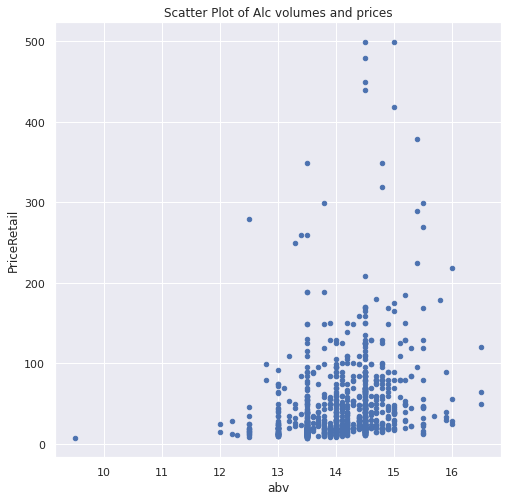

In [ ]:
ax1 = red_wines_final.plot.scatter(x='abv',
                      y='PriceRetail', figsize=(8,8), title='Scatter Plot of Alc volumes and prices')

In [ ]:
red_wines_final.head()

,abv,PriceRetail
0,14.2,14.99
1,14.0,35.00
2,14.5,125.00
3,14.5,34.00
4,13.8,26.99


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(red_wines_final)
y_kmeans = kmeans.predict(red_wines_final)


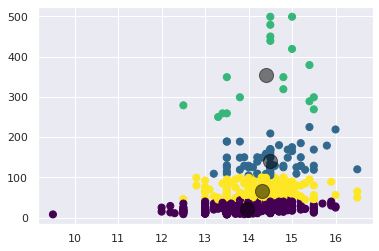

In [ ]:
#visualize the results

plt.scatter(red_wines_final.abv, red_wines_final.PriceRetail, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

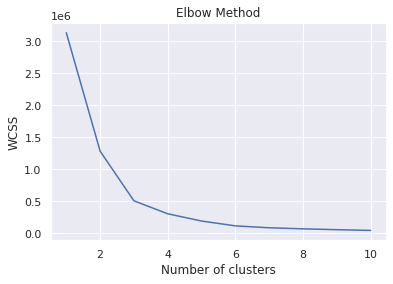

In [ ]:
#elbow method 

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(red_wines_final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

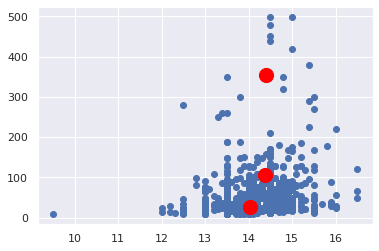

In [ ]:
#using optimum # of clusters 

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(red_wines_final)
plt.scatter(red_wines_final['abv'], red_wines_final['PriceRetail'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

# Example 4 - Wine V2 (w/Plotly)

In [ ]:
#import libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import plotly.express as px


In [ ]:
#read in data

wine_data = pd.read_csv("/content/wine_data.csv", encoding='latin-1')  
wine_data.head()

,Name,abv,year,PriceRetail,Appellation_Region_Name,Varietal_Name,Varietal_WineType_Name,Winemakers_Notes
0,Milbrandt Traditions Merlot 2007,14.2,2007.0,14.99,Washington,Merlot,Red Wines,Our 2007 Traditions Merlot features grapes fro...
1,MacLaren Drouthy Neebors Syrah 2009,14.0,2009.0,35.00,California,Syrah/Shiraz,Red Wines,Deep Purple color. Layered aromatics: Black Ra...
2,Cliff Lede Poetry Stags Leap District Cabernet...,14.5,2001.0,125.00,California,Cabernet Sauvignon,Red Wines,Beautiful bottle-aged aromas are revealing the...
3,Tenuta di Biserno Campo di Sasso Insoglio del ...,14.5,2007.0,34.00,Italy,Other Red Blends,Red Wines,Insoglio del Cinghiale is the foundation wine ...
4,Gordon Brothers Cabernet Sauvignon 2010,13.8,2010.0,26.99,Washington,Cabernet Sauvignon,Red Wines,"Black cherry and cranberry, vanilla roasting o..."


In [ ]:
#just take red wines

#red_wines = wine_data.loc[(wine_data['Varietal_WineType_Name'] = Red Wines)]

red_wines = wine_data[wine_data.Varietal_WineType_Name == 'Red Wines']

red_wines.head()

,Name,abv,year,PriceRetail,Appellation_Region_Name,Varietal_Name,Varietal_WineType_Name,Winemakers_Notes
0,Milbrandt Traditions Merlot 2007,14.2,2007.0,14.99,Washington,Merlot,Red Wines,Our 2007 Traditions Merlot features grapes fro...
1,MacLaren Drouthy Neebors Syrah 2009,14.0,2009.0,35.00,California,Syrah/Shiraz,Red Wines,Deep Purple color. Layered aromatics: Black Ra...
2,Cliff Lede Poetry Stags Leap District Cabernet...,14.5,2001.0,125.00,California,Cabernet Sauvignon,Red Wines,Beautiful bottle-aged aromas are revealing the...
3,Tenuta di Biserno Campo di Sasso Insoglio del ...,14.5,2007.0,34.00,Italy,Other Red Blends,Red Wines,Insoglio del Cinghiale is the foundation wine ...
4,Gordon Brothers Cabernet Sauvignon 2010,13.8,2010.0,26.99,Washington,Cabernet Sauvignon,Red Wines,"Black cherry and cranberry, vanilla roasting o..."


In [ ]:
#drop column names
red_wines = red_wines.drop(["Name","year","Appellation_Region_Name","Varietal_WineType_Name","Winemakers_Notes"], axis=1)
red_wines.head()


,abv,PriceRetail,Varietal_Name
0,14.2,14.99,Merlot
1,14.0,35.00,Syrah/Shiraz
2,14.5,125.00,Cabernet Sauvignon
3,14.5,34.00,Other Red Blends
4,13.8,26.99,Cabernet Sauvignon


In [ ]:
#remove outliers
red_wines_final = red_wines[red_wines['PriceRetail'] <= 500.00]

In [ ]:
#scatterplot with labels 

#fig = px.line(df, x="year", y="lifeExp", color="country", title="layout.hovermode='closest' (the default)")
#fig.update_traces(mode="markers+lines")

fig = px.scatter(x=red_wines_final.abv, y=red_wines_final.PriceRetail, color =red_wines_final.Varietal_Name)

fig.show()

# Example 5 - Wine V3 (3d kmeans)



*   https://thatascience.com/learn-machine-learning/k-means/
*   https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html 
*   https://www.kaggle.com/naren3256/kmeans-clustering-and-cluster-visualization-in-3d
*   https://plotly.com/python/v3/3d-point-clustering/






